# Polynomial Curve Fitting

In [5]:
import numpy as np
import matplotlib.pyplot as plt
def polynomial_data_generation(n_samples):
    np.random.seed(10)

    x = 10 * np.random.normal(0, 0.5, n_samples)  # x is an n_samples array. pick numbers normally distributed between 0 and 0.5 inclusive, then times by 10. so-- limits of 0 and 5.
    y = x - 3 * (x ** 2) + 0.5 * (x ** 3) + 3*np.random.normal(3, 10, n_samples)  # y is the function x - 3x^2 + .5x^3 + (array) 3*n_samples [where n_samples is normally distributed between 3 and 10 inclusive]
    print('generating '+ str(n_samples)+ ' data points from a certain polynomial function')
    return x, y

def vis_data_points(x, y):
    plt.scatter(x,y, s=20)  # scatter plot of y vs x, and the points have size 20
    plt.show()  # show the plot
    


def poly_fitting(x, y, p_Order):
    coefficients = np.polyfit(x,y,p_Order)  # x and y co-ordinates. the degree of the fitting polynomial is p_Order. go get the co-ordinates of the stationary points basically.
    poly_func = np.poly1d(coefficients)     # for n co-efficients, poly_func will be (x-p1)(x-p2)...(x-pn)
    return poly_func


generating 100 data points from a certain polynomial function
using 20 samples for curve fitting


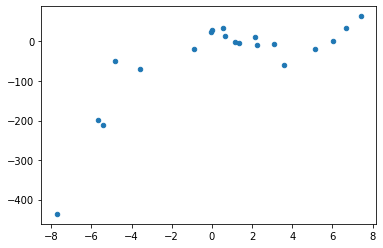

we will use 80 samples for testing


In [6]:
n_samples = 100
x, y = polynomial_data_generation(n_samples)  # get 100 (x, y) co-ordinates 
# use 20% data points for curve fitting
n_train = int(np.round(n_samples* 0.2))
print('using {:.0f} samples for curve fitting'.format(n_train))
x0 = x[:n_train]  # x0 = (1, ..., n_train - 1)
y0 = y[:n_train]
x1 = x[n_train:]# use the rest for testing  # x1 = (n_train, ..., xn)
y1 = y[n_train:]
vis_data_points(x0, y0)
print('we will use {:.0f} samples for testing'.format(n_samples - n_train) )

## Assuming it is a Polynomial function with order M: 
y = $f(x, \mathbf{w}) = \sum_{i=0}^Mw_ix^j = w_0+w_1x+w_2x^2+...+w_Mx^M$
## what is the best M?
### Let's try M= {0, 1, 3, 9}

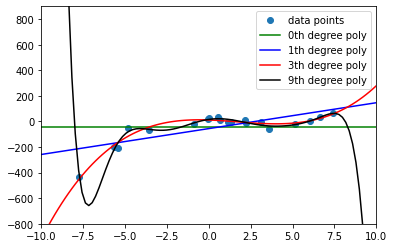

In [10]:
fig = plt.figure()
xx = np.linspace(-10, 10, 100)
plt.axis([-10,10,-800,900])
plt.plot(x0,y0,'o',xx,poly_fitting(x0, y0, 0)(xx),'-g', # plot the training <x, y> co-ords using circle markers.
                   xx,poly_fitting(x0, y0, 1)(xx),'-b', # then plot the following line graphs along the xx linspace
                   xx,poly_fitting(x0, y0, 3)(xx),'-r', # poly_fitting's factors will be along xx.
                   xx,poly_fitting(x0, y0, 9)(xx),'-k',
        )
plt.legend(['data points', '0th degree poly',   # high level what the above means
                           '1th degree poly',
                           '3th degree poly', 
                           '9th degree poly'
           ])
plt.show()

## Which M is better? 
    

In [ ]:
from sklearn.metrics import mean_squared_error

p_orders = [0, 1, 3, 9]
for M in p_orders:
    print('-------------------')
    print('p_order:', M)
    poly_func_M = poly_fitting(x0, y0, M) # now make a fitting along the ground truth of m degree
    print(poly_func_M)
    _RMSE = np.sqrt(mean_squared_error(y0, poly_func_M(x0)))    # calculate the rmse (lower the better)
    print('                           RMSE: {:0.2f}'.format(_RMSE))


-------------------
p_order: 0
 
-43.6
                           RMSE: 113.13
-------------------
p_order: 1
 
20.21 x - 55.6
                           RMSE: 75.28
-------------------
p_order: 3
       3         2
0.643 x - 3.302 x - 4.549 x + 11.56
                           RMSE: 24.71
-------------------
p_order: 9
            9             8            7           6           5
-4.416e-05 x + 0.0004168 x + 0.003504 x - 0.04408 x - 0.02606 x
          4         3         2
 + 1.357 x - 1.315 x - 16.04 x + 18.67 x + 16.2
                           RMSE: 18.77


### Is a larger M better? test on some test data (x1, y1)


In [ ]:
p_orders = [0, 1, 3, 9]
for M in p_orders:
    print('-------------------')
    print('p_order:', M)
    poly_func_M = poly_fitting(x0, y0, M)
    print(poly_func_M)
    _RMSE = np.sqrt(mean_squared_error(y0, poly_func_M(x0)))  
    test_RMSE = np.sqrt(mean_squared_error(y1, poly_func_M(x1)))  
    print('                           RMSE: {:0.2f}'.format(_RMSE))
    print('                      test_RMSE: {:0.2f}'.format(test_RMSE))


-------------------
p_order: 0
 
-43.6
                           RMSE: 113.13
                      test_RMSE: 235.71
-------------------
p_order: 1
 
20.21 x - 55.6
                           RMSE: 75.28
                      test_RMSE: 164.96
-------------------
p_order: 3
       3         2
0.643 x - 3.302 x - 4.549 x + 11.56
                           RMSE: 24.71
                      test_RMSE: 51.49
-------------------
p_order: 9
            9             8            7           6           5
-4.416e-05 x + 0.0004168 x + 0.003504 x - 0.04408 x - 0.02606 x
          4         3         2
 + 1.357 x - 1.315 x - 16.04 x + 18.67 x + 16.2
                           RMSE: 18.77
                      test_RMSE: 10722.24


visualise the test data


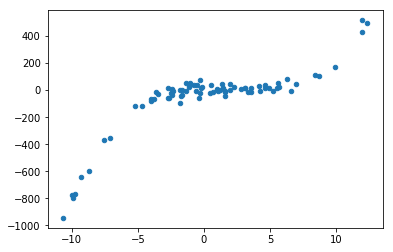

In [ ]:
print('visualise the test data')
vis_data_points(x1, y1)


### Reducing the effect of overfitting by using bigger data? 
Setting n_sample = 10000, and use 20% of the data for training (2000). test M = {3, 9}

generating 10000 data points from a certain polynomial function


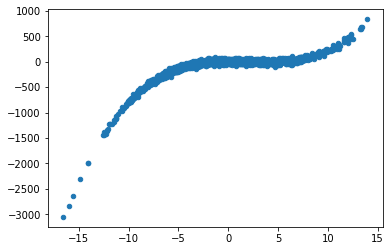

we're using 2000 samples to train our model,
which leaves us with 8000 samples to test our model.


In [14]:
# sample size = 10 000
n_sample = 10000

# get 10 000 co-ordinates
x, y = polynomial_data_generation(n_sample)

# take 20% of the co-ordinates for training
n_train = int(np.round(0.2 * n_sample))

x_train = x[:n_train]
y_train = y[:n_train]

# use the rest for testing
x_test = x[n_train:]
y_test = y[n_train:]

# let's see what (x_train, y_train) gives us!
vis_data_points(x_train, y_train)
print("we're using {:.0f} samples to train our model,".format(n_train))
print("which leaves us with {:.0f} samples to test our model.".format(n_sample - n_train))

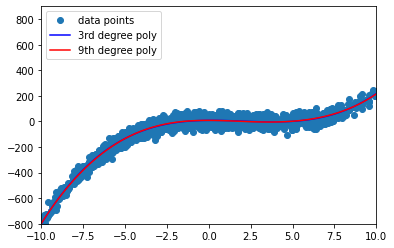

In [21]:
# let's see how our model goes for M = {3, 9}

# create an empty figure
fig = plt.figure()

# set the axes limits. x is bound [-10, 10] and y is bound [-800, 900].
plt.axis([-10, 10, -800, 900])

# create a linear space. we're doing this for the x axis, with limits [-10, 10] and there are 100 points in between.
xx = np.linspace(-10, 10, 100)

# now plot the training points
plt.plot(x_train, y_train, 'o', xx, poly_fitting(x_train, y_train, 3)(xx), '-b',
                                xx, poly_fitting(x_train, y_train, 9)(xx), '-r',
         )
# create a legend to describe at a high level what the above is
plt.legend(['data points', '3rd degree poly',
                           '9th degree poly'
           ])

# show the plot
plt.show()

In [23]:
# now identify which M is better on the training data

# using squared mean squared error to identify which M is better
from sklearn.metrics import mean_squared_error

p_orders = [3, 9]
for M in p_orders:
  # pretty printing
  print("-----------------")
  print("p order: ", M)
  # get the co-efficients for the learned polynomial fittings
  poly_func_M_cw = poly_fitting(x_train, y_train, M)
  # now print the factors of the polynomial at degree M
  print(poly_func_M_cw)
  # calculate the root mean squared error
  rmse = np.sqrt(mean_squared_error(y_train, poly_func_M_cw(x_train)))
  # print the root mean squared error
  print("\n RMSE: {0:.2f}".format(rmse))

-----------------
p order:  3
       3         2
0.498 x - 2.985 x + 0.9488 x + 8.814

 RMSE: 30.33
-----------------
p order:  9
            9             8             7             6            5
-2.099e-08 x - 8.306e-08 x + 1.019e-05 x + 2.816e-05 x - 0.001619 x
             4          3         2
 - 0.002713 x + 0.5909 x - 2.917 x - 0.4147 x + 8.675

 RMSE: 30.27


In [24]:
# now identify which M is better on the unseen data

for M in p_orders:
  # pretty printing
  print("----------------")
  print("p order: ", M)

  # get the factors
  poly_func_M_cw = poly_fitting(x_train, y_train, M)
  print(poly_func_M_cw)

  # get the rmse of both training and test data
  rmse = np.sqrt(mean_squared_error(y_train, poly_func_M_cw(x_train)))
  rmse_unseen = np.sqrt(mean_squared_error(y_test, poly_func_M_cw(x_test)))

  # pretty printing of rmse

  print("\nRMSE: {0:.2f}".format(rmse))
  print("unseen RMSE: {0:.2f}".format(rmse_unseen))

----------------
p order:  3
       3         2
0.498 x - 2.985 x + 0.9488 x + 8.814

RMSE: 30.33
unseen RMSE: 30.18
----------------
p order:  9
            9             8             7             6            5
-2.099e-08 x - 8.306e-08 x + 1.019e-05 x + 2.816e-05 x - 0.001619 x
             4          3         2
 - 0.002713 x + 0.5909 x - 2.917 x - 0.4147 x + 8.675

RMSE: 30.27
unseen RMSE: 34.97


In [ ]:
# so it looks like the lower M is still better